In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Spendable income

In [9]:

# Load the CSV file
file_path = '/Applications/UNI/Thesis/datasets/Distribution of spendable income, 2022.csv'
income_distribution = pd.read_csv(file_path)

# Display the first few rows of the dataframe
income_distribution.head()


,spendable income (x 1000 euros),Households total,Single persion,Single person under AOW pension age,Single person above AOW entitlement age,Couple without children,Couple under AOW pension age without children,Couple above AOW entitlement age without children,Couple with children,Single-parent family,...,Three earners,Four or more earners,Wages,Profits,Pensions,Benefits,Private home owner,Tenant,Tenant without rent benefit,Tenant with rent benefit
0,less than -6,4,2,1,1,1,1,0,1,0,...,0,0,1,2,1,0,3,1,1,0
1,between -6 and -4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,between -4 and -2,2,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,1,0
3,between -2 and 0,21,19,19,0,1,1,0,0,0,...,0,0,7,2,0,12,1,20,19,1
4,between 0 and 2,38,35,32,2,2,2,0,0,0,...,0,0,22,4,2,10,1,36,29,7


Total probability: 1.0000000000000002


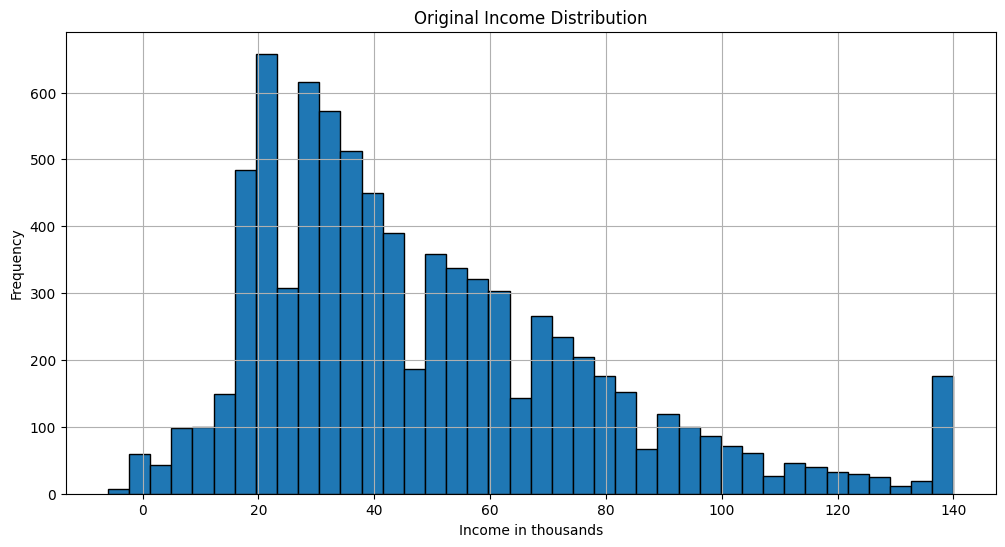

Updated Income Distribution with Probabilities
  spendable income (x 1000 euros)  Households total  Income in thousands  \
0                    less than -6                 4                 -6.0   
1               between -6 and -4                 1                 -5.0   
2               between -4 and -2                 2                 -3.0   
3                between -2 and 0                21                 -1.0   
4                 between 0 and 2                38                  1.0   

   Probability  
0     0.000498  
1     0.000124  
2     0.000249  
3     0.002613  
4     0.004728  


In [16]:

# Extract the relevant columns
income_distribution = income_distribution[['spendable income (x 1000 euros)', 'Households total']]

# Convert spendable income categories to numerical values
def convert_income_category(category):
    if 'less than' in category:
        return -6
    elif 'between' in category:
        parts = category.split(' and ')
        return (float(parts[0].split()[-1]) + float(parts[1].split()[0])) / 2
    elif 'more than' in category:
        return 140
    else:
        return float(category)

income_distribution['Income in thousands'] = income_distribution['spendable income (x 1000 euros)'].apply(convert_income_category)

# Calculate the total number of households
total_households = income_distribution['Households total'].sum()


# Calculate the probability for each income category
income_distribution['Probability'] = income_distribution['Households total'] / total_households


# Plot the original income distribution
plt.figure(figsize=(12, 6))
plt.hist(income_distribution['Income in thousands'], bins=40, weights=income_distribution['Households total'], edgecolor='black')
plt.title('Original Income Distribution')
plt.xlabel('Income in thousands')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Save the updated income distribution to a new CSV file
output_file_path = '/Applications/UNI/Thesis/datasets/Adjusted_Distribution_of_spendable_income_2022.csv'
income_distribution.to_csv(output_file_path, index=False)

# Display the first few rows of the updated dataframe
print("Updated Income Distribution with Probabilities")
print(income_distribution.head())

